In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab
import xlrd
%matplotlib inline

In [2]:
data = pd.read_csv("DataFest2017-Data-And-Documents/data.txt", sep='\t')

In [3]:
dest = pd.read_csv("DataFest2017-Data-And-Documents/dest.txt", sep='\t')

In [5]:
data.columns.values

array(['date_time', 'site_name', 'user_location_country',
       'user_location_region', 'user_location_city',
       'user_location_latitude', 'user_location_longitude',
       'orig_destination_distance', 'user_id', 'is_mobile', 'is_package',
       'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt',
       'srch_children_cnt', 'srch_rm_cnt', 'srch_destination_id',
       'hotel_country', 'is_booking', 'hotel_id', 'prop_is_branded',
       'prop_starrating', 'distance_band', 'hist_price_band',
       'popularity_band', 'cnt'], dtype=object)

# Booked data

In [9]:
booked_data = data[data.is_booking==1]

In [10]:
booked_data.to_csv("booked_data.csv")

In [11]:
booked_data.count()

date_time                    958896
site_name                    958896
user_location_country        958874
user_location_region         953484
user_location_city           958896
user_location_latitude       768590
user_location_longitude      768590
orig_destination_distance    768590
user_id                      958896
is_mobile                    958896
is_package                   958896
channel                      958896
srch_ci                      958888
srch_co                      958892
srch_adults_cnt              958896
srch_children_cnt            958896
srch_rm_cnt                  958896
srch_destination_id          958896
hotel_country                958896
is_booking                   958896
hotel_id                     958896
prop_is_branded              958896
prop_starrating              958896
distance_band                958896
hist_price_band              958896
popularity_band              958896
cnt                          958896
dtype: int64

## Country Anlysis

In [12]:
country_info = pd.crosstab(booked_data.user_location_country,data.hotel_country)

In [13]:
country_info.to_csv("user_country_VS_hotel_country.csv")

In [14]:
country_info

hotel_country,ALBANIA,ALGERIA,AMERICAN SAMOA,ANDORRA,ANGOLA,ANGUILLA,ANTIGUA AND BARBUDA,ARGENTINA,ARMENIA,ARUBA,...,UNITED ARAB EMIRATES,UNITED KINGDOM,UNITED STATES OF AMERICA,URUGUAY,UZBEKISTAN,VANUATU,VENEZUELA,VIETNAM,ZAMBIA,ZIMBABWE
user_location_country,,,,,,,,,,,,,,,,,,,,,
AFGHANISTAN,0,0,0,0,0,0,0,0,0,0,...,47,1,36,0,0,0,0,3,0,0
ALAND,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ALBANIA,6,0,0,0,0,0,0,0,0,0,...,0,2,2,0,0,0,0,0,0,0
ALGERIA,0,2,0,0,0,0,0,0,0,0,...,2,9,5,0,0,0,0,0,0,0
AMERICAN SAMOA,0,0,0,0,0,0,0,0,0,0,...,0,0,4,0,0,0,0,0,0,0
ANDORRA,0,0,0,3,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
ANGOLA,0,0,0,0,1,0,0,0,0,0,...,1,1,25,0,0,0,0,0,0,1
ANGUILLA,0,0,0,0,0,0,0,0,0,0,...,0,4,11,0,0,0,0,0,0,0
ANTIGUA AND BARBUDA,0,0,0,0,0,1,8,0,0,0,...,1,10,42,0,0,0,0,0,0,0


# User id

In [15]:
# total number of users
data.user_id.drop_duplicates().count()

805492

In [16]:
# number of users who actually booked hotel
booked_data.user_id.drop_duplicates().count()

568412

In [17]:
# number of bookings made
len(booked_data.index)

958896

In [18]:
# distribution of # of bookings
num_bookings = booked_data.groupby("user_id").size().value_counts()
num_bookings

1      418413
2       78335
3       29170
4       14636
5        8338
6        5288
7        3457
8        2516
9        1781
10       1259
11        950
12        692
13        562
14        477
15        361
16        325
17        251
18        217
20        151
19        150
21        122
23        111
22        108
24         70
25         69
26         67
29         49
28         48
27         46
32         31
        ...  
58          3
82          3
52          3
68          3
80          2
72          2
79          2
81          2
75          2
74          2
66          2
60          2
54          2
53          2
83          2
89          1
94          1
102         1
103         1
88          1
87          1
85          1
111         1
77          1
76          1
70          1
69          1
67          1
65          1
122         1
Length: 89, dtype: int64

In [325]:
us_data = data[data.user_location_country=="UNITED STATES OF AMERICA"]
us_booked_data = booked_data[booked_data.user_location_country=="UNITED STATES OF AMERICA"]

In [326]:
print(us_data.user_id.drop_duplicates().count())
print(us_booked_data.user_id.drop_duplicates().count())
print(len(us_booked_data.index))

634106
445997
733122


In [327]:
# distribution of # of bookings
us_num_bookings = us_booked_data.groupby("user_id").size().value_counts()
us_num_bookings

1      330633
2       61561
3       22599
4       11086
5        6277
6        3942
7        2525
8        1780
9        1252
10        875
11        658
12        497
13        397
14        306
15        243
16        204
17        149
18        141
20        102
19         99
23         73
22         67
21         66
24         46
25         39
26         39
29         33
27         28
28         24
32         22
        ...  
56          3
82          3
63          3
61          3
52          3
51          3
54          2
72          2
83          2
47          2
81          2
80          2
79          2
58          2
75          2
66          2
60          2
53          2
68          1
74          1
77          1
65          1
62          1
103         1
85          1
87          1
89          1
94          1
102         1
122         1
Length: 83, dtype: int64

In [19]:
temp_data = booked_data.groupby("user_id").size()
temp_data.to_csv("temp.csv")

In [20]:
num_bookings.to_csv("num_bookings_per_user.csv")

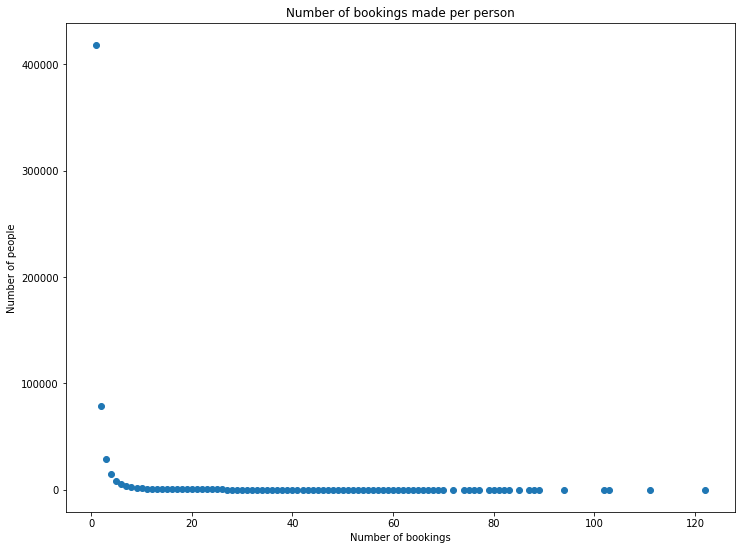

In [26]:
fig, ax = plt.subplots(figsize=(12, 9))
pylab.scatter(num_bookings.index,num_bookings)
plt.xlabel('Number of bookings')
plt.ylabel('Number of people')
plt.title('Number of bookings made per person')

In [27]:
data[["user_id", "user_location_country","user_location_region", "user_location_city", 
           "orig_destination_distance", "hotel_country", "is_booking"]]

,user_id,user_location_country,user_location_region,user_location_city,orig_destination_distance,hotel_country,is_booking
0,-2147479371,UNITED STATES OF AMERICA,CA,BRENTWOOD,5539.5830,FRANCE,0
1,-2147479371,UNITED STATES OF AMERICA,CA,BRENTWOOD,5873.0280,FRANCE,0
2,-2147479371,UNITED STATES OF AMERICA,CA,BRENTWOOD,5329.1407,UNITED KINGDOM,0
3,-2147479371,UNITED STATES OF AMERICA,CA,BRENTWOOD,5329.1407,UNITED KINGDOM,0
4,-2147479371,UNITED STATES OF AMERICA,CA,BRENTWOOD,5329.1407,UNITED KINGDOM,0
5,-2147476571,UNITED STATES OF AMERICA,SD,SIOUX FALLS,161.9662,UNITED STATES OF AMERICA,0
6,-2147476571,UNITED STATES OF AMERICA,SD,SIOUX FALLS,195.1040,UNITED STATES OF AMERICA,0
7,-2147476571,UNITED STATES OF AMERICA,SD,SIOUX FALLS,195.1040,UNITED STATES OF AMERICA,0
8,-2147476571,UNITED STATES OF AMERICA,SD,SIOUX FALLS,199.6104,UNITED STATES OF AMERICA,0
9,-2147471748,UNITED STATES OF AMERICA,CA,LOS ANGELES,5477.8567,JAPAN,0


In [28]:
data["hotel_country"].drop_duplicates().count()

208

In [29]:
data[data.is_booking==1].groupby(["channel"]).size()

channel
231    142791
262     84861
293     95885
324     70282
355     16573
386     17388
417       166
448      5519
479      2524
510    145276
541    377631
dtype: int64

# Case Analysis (122 times)

In [30]:
data_122 = data[data.user_id == -1121899375]

In [31]:
data_122.to_csv("case_anlysis_122.csv")

# Date Analysis

In [32]:
date = booked_data[["date_time", "srch_ci", "srch_co", "user_location_country", "hotel_country"]]
date["booking_date"] = date["date_time"].str.extract('(....-..-..)', expand = True)


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,date_time,srch_ci,srch_co,user_location_country,hotel_country,booking_date
12,2015-11-10 13:38:00,2015-11-10,2015-11-11,CANADA,CANADA,2015-11-10
20,2015-07-17 09:32:00,2015-07-22,2015-07-23,UNITED STATES OF AMERICA,UNITED STATES OF AMERICA,2015-07-17
35,2015-04-03 06:34:00,2015-04-05,2015-04-07,UNITED STATES OF AMERICA,UNITED STATES OF AMERICA,2015-04-03
49,2015-10-29 10:36:00,2015-10-31,2015-11-01,UNITED STATES OF AMERICA,UNITED STATES OF AMERICA,2015-10-29
52,2015-08-12 11:42:00,2015-09-17,2015-09-21,UNITED STATES OF AMERICA,MEXICO,2015-08-12
56,2015-07-01 06:47:00,2015-07-01,2015-07-03,UNITED STATES OF AMERICA,UNITED STATES OF AMERICA,2015-07-01
78,2015-02-02 02:52:00,2015-03-25,2015-03-30,PSE,TURKEY,2015-02-02
90,2015-08-12 05:22:00,2015-08-12,2015-08-13,UNITED STATES OF AMERICA,UNITED STATES OF AMERICA,2015-08-12
92,2015-06-29 09:11:00,2015-08-08,2015-08-09,UNITED STATES OF AMERICA,UNITED STATES OF AMERICA,2015-06-29
100,2015-05-11 12:21:00,2015-05-19,2015-05-20,UNITED STATES OF AMERICA,UNITED STATES OF AMERICA,2015-05-11


In [33]:
date["formatted_booking_date"] = pd.to_datetime(date.booking_date, format="%Y/%m/%d")
date["formatted_ci_date"] = pd.to_datetime(date.srch_ci, format="%Y/%m/%d")
date["formatted_co_date"] = pd.to_datetime(date.srch_co, format="%Y/%m/%d")

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [34]:
date.to_csv("data_by_date.csv")

In [35]:
date["num_days"] = (date.formatted_ci_date - date.formatted_booking_date).dt.days

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [36]:
null_dropped = date[~date.num_days.isnull()]
negative_removed = null_dropped[null_dropped.num_days >= 0]

In [37]:
converted_to_int = negative_removed.num_days.astype(int)
nds = converted_to_int.value_counts()
nds

0      97383
1      76258
2      47327
3      39254
4      33936
5      29611
6      26186
7      23489
8      20826
9      19240
10     17949
11     16878
12     15434
13     14482
14     14026
15     13300
16     13042
17     12254
18     11818
19     11234
20     10610
21     10174
22      9948
23      9943
24      9640
25      9141
26      8536
27      8131
28      8011
29      7863
       ...  
496        2
484        1
483        1
482        1
489        1
491        1
492        1
479        1
478        1
495        1
431        1
466        1
475        1
471        1
434        1
430        1
437        1
429        1
421        1
444        1
447        1
412        1
411        1
410        1
452        1
456        1
433        1
405        1
470        1
498        1
Name: num_days, Length: 480, dtype: int64

In [43]:
nds.to_csv("data_by_date_numdates.csv")

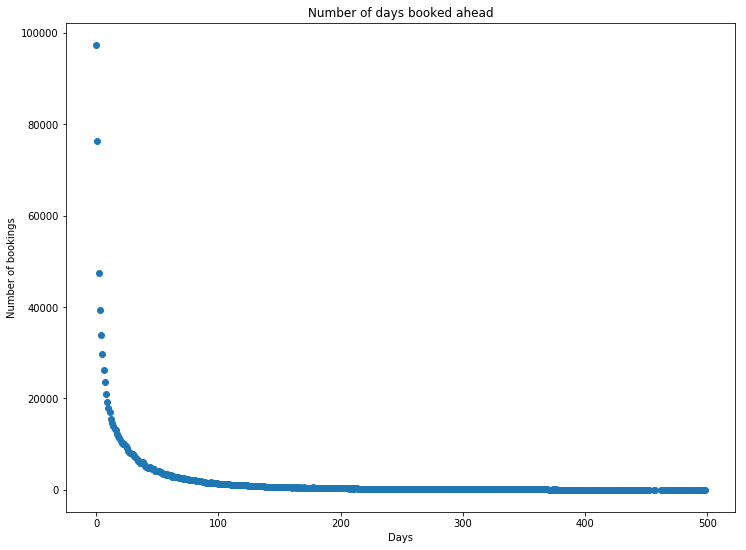

In [38]:
fig, ax = plt.subplots(figsize=(12, 9))
pylab.scatter(nds.index, nds)
plt.xlabel('Days')
plt.ylabel('Number of bookings')
plt.title('Number of days booked ahead')

# Date vs Country

In [55]:
date_by_country = negative_removed[["user_location_country", "hotel_country"]]
date_by_country["num_days"] = negative_removed.num_days.astype(int)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [56]:
date_by_country.to_csv("date_by_country.csv")

In [97]:
date_by_country

,user_location_country,hotel_country,num_days
12,CANADA,CANADA,0
20,UNITED STATES OF AMERICA,UNITED STATES OF AMERICA,5
35,UNITED STATES OF AMERICA,UNITED STATES OF AMERICA,2
49,UNITED STATES OF AMERICA,UNITED STATES OF AMERICA,2
52,UNITED STATES OF AMERICA,MEXICO,36
56,UNITED STATES OF AMERICA,UNITED STATES OF AMERICA,0
78,PSE,TURKEY,51
90,UNITED STATES OF AMERICA,UNITED STATES OF AMERICA,0
92,UNITED STATES OF AMERICA,UNITED STATES OF AMERICA,40
100,UNITED STATES OF AMERICA,UNITED STATES OF AMERICA,8


# Continent Analysis

In [65]:
continent = pd.read_excel("User vs Hotel Continent Analysis.xlsx",skiprows=[0,1],index_col=0
                         ,names=["Asia", "Africa", "Americas", "Europe", "Oceania", "SUM"])

In [66]:
continent

,Asia,Africa,Americas,Europe,Oceania,SUM
Row Labels,,,,,,
Africa,767,1758,1079,2493,46,6143
Americas,28309,2288,764350,70658,4718,870323
Asia,14895,735,8360,7273,469,31732
Europe,4768,793,9788,32781,570,48700
Oceania,369,10,550,135,912,1976
Grand Total,49108,5584,784127,113340,6715,958874


In [68]:
cont_no_sums = continent[["Asia", "Africa", "Americas", "Europe", "Oceania"]].loc[:"Oceania"]
cont_no_sums

,Asia,Africa,Americas,Europe,Oceania
Row Labels,,,,,
Africa,767,1758,1079,2493,46
Americas,28309,2288,764350,70658,4718
Asia,14895,735,8360,7273,469
Europe,4768,793,9788,32781,570
Oceania,369,10,550,135,912


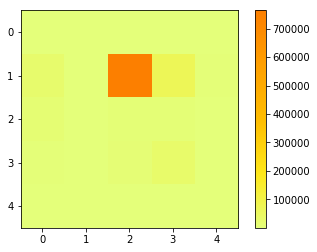

In [72]:
plt.imshow(cont_no_sums, interpolation='nearest', cmap=plt.cm.Wistia)
plt.colorbar()
plt.show()

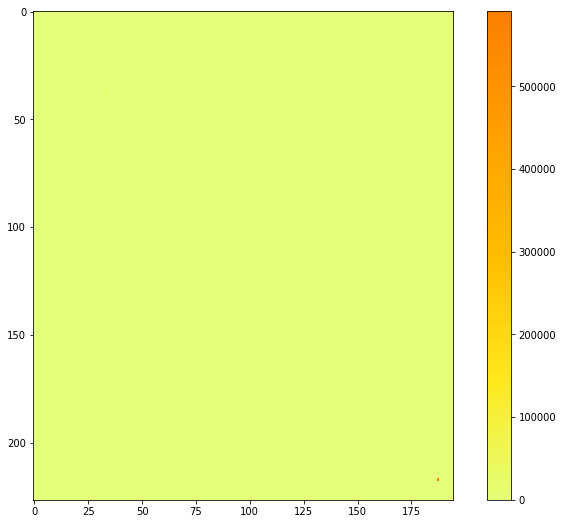

In [111]:
fig, ax = plt.subplots(figsize=(12, 9))
plt.imshow(country_info, interpolation='nearest', cmap=plt.cm.Wistia)
plt.colorbar()
plt.show()

In [96]:
country_info.loc[~country_info.apply(lambda row: (row==0).all(), axis=1)]

hotel_country,ALBANIA,ALGERIA,AMERICAN SAMOA,ANDORRA,ANGOLA,ANGUILLA,ANTIGUA AND BARBUDA,ARGENTINA,ARMENIA,ARUBA,...,UNITED ARAB EMIRATES,UNITED KINGDOM,UNITED STATES OF AMERICA,URUGUAY,UZBEKISTAN,VANUATU,VENEZUELA,VIETNAM,ZAMBIA,ZIMBABWE
user_location_country,,,,,,,,,,,,,,,,,,,,,


In [122]:
smaller_cont = pd.read_csv("SH/User_vs_Hotel_Continent_Analysis.csv", skiprows = [0], index_col = 0,
                           names = ["Row Labels","Southern Asia","Northern Europe","Western Asia",
                                      "South-Eastern Asia","Central Asia","Northern Africa","Polynesia",
                                      "Southern Europe","Middle Africa","Caribbean","South America",
                                      "Commonwealth of Independent States","Australia and New Zealand",
                                      "Western Europe","Central America","Western Africa","Northern America",
                                      "Southern Africa","Oceania","Eastern Europe","Eastern Asia","Eastern Africa",
                                      "Europe","Melanesia","Micronesian Region","Channel Islands Europe"])
smaller_cont[smaller_cont.sum(axis=1) > 100]

,Southern Asia,Northern Europe,Western Asia,South-Eastern Asia,Central Asia,Northern Africa,Polynesia,Southern Europe,Middle Africa,Caribbean,...,Northern America,Southern Africa,Oceania,Eastern Europe,Eastern Asia,Eastern Africa,Europe,Melanesia,Micronesian Region,Channel Islands Europe
Row Labels,,,,,,,,,,,,,,,,,,,,,
Commonwealth of Independent States,23,250,128,93,6,106,1,236,0,8,...,427,9,0,129,64,13,0,1,1,0
Eastern Europe,20,146,95,100,3,98,1,261,0,18,...,378,7,0,661,38,13,0,2,0,0
Northern Europe,29,1863,160,144,1,194,4,311,1,31,...,1103,15,0,102,119,19,0,0,0,0
Southern Europe,15,230,109,59,0,206,0,1964,0,14,...,435,1,0,102,45,4,0,0,0,0
Western Europe,166,3540,1189,1463,17,2547,8,3738,26,150,...,6382,241,0,1047,648,113,0,7,3,0
Australia and New Zealand,7,23,19,107,0,14,1,15,0,4,...,368,5,0,9,51,2,0,16,0,0
Melanesia,0,0,0,8,0,2,0,3,0,0,...,21,0,0,0,2,0,0,46,0,0
Micronesian Region,4,1,5,85,0,0,0,2,0,0,...,60,0,0,1,64,0,0,2,56,0
Polynesia,0,1,0,1,0,0,5,1,0,0,...,52,0,0,0,5,0,0,4,0,0


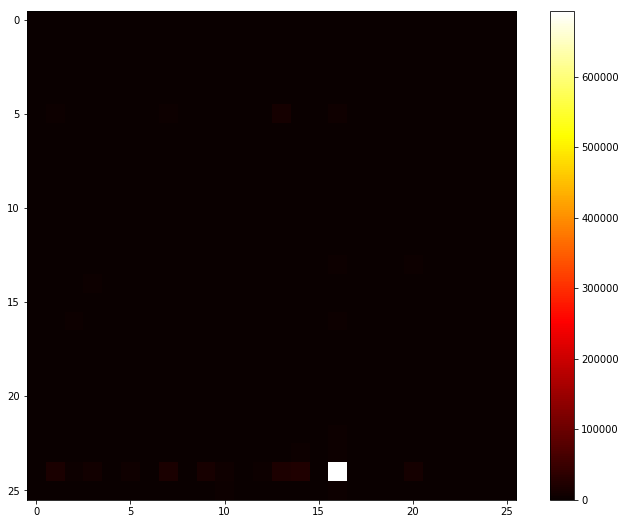

In [114]:
fig, ax = plt.subplots(figsize=(12, 9))
plt.imshow(smaller_cont, interpolation='nearest', cmap=plt.cm.hot)
plt.colorbar()
plt.show()

# US data

In [304]:
us_dom = booked_data[(booked_data.user_location_country == "UNITED STATES OF AMERICA")
              &(booked_data.hotel_country == "UNITED STATES OF AMERICA")]
us_dom.groupby(["user_location_city"]).size().sort_values(ascending=False)

user_location_city
NEW YORK            10100
LOS ANGELES          9832
HOUSTON              8643
CHICAGO              7336
SEATTLE              6189
DENVER               5376
SAN FRANCISCO        5255
MIAMI                4853
SAN DIEGO            4667
SAN JOSE             4391
ATLANTA              4252
LAS VEGAS            4235
DALLAS               4172
PHOENIX              3974
BROOKLYN             3854
PORTLAND             3704
AUSTIN               3282
WASHINGTON           3257
PHILADELPHIA         3005
MINNEAPOLIS          2967
ORLANDO              2886
SALT LAKE CITY       2803
SAN ANTONIO          2738
CHARLOTTE            2294
FT LAUDERDALE        2260
TAMPA                2216
FT WORTH             2204
ARLINGTON            2137
SACRAMENTO           2129
ST LOUIS             2014
                    ...  
PARKSVILLE              1
PARROTT                 1
PARTRIDGE               1
DORENA                  1
PASSADUMKEAG            1
PATRICK SPRINGS         1
PATRIOT            

In [306]:
us_dom

,date_time,site_name,user_location_country,user_location_region,user_location_city,user_location_latitude,user_location_longitude,orig_destination_distance,user_id,is_mobile,...,srch_destination_id,hotel_country,is_booking,hotel_id,prop_is_branded,prop_starrating,distance_band,hist_price_band,popularity_band,cnt
20,2015-07-17 09:32:00,EXPEDIA.COM,UNITED STATES OF AMERICA,WI,MADISON,43.075900,-89.376740,73.6646,-2147108231,0,...,18682180,UNITED STATES OF AMERICA,1,1239534,1,3.0,M,L,H,1
35,2015-04-03 06:34:00,EXPEDIA.COM,UNITED STATES OF AMERICA,CA,FORESTVILLE,38.498541,-122.920947,177.4716,-2147037356,0,...,187681656,UNITED STATES OF AMERICA,1,839231,1,3.0,C,M,VH,1
49,2015-10-29 10:36:00,EXPEDIA.COM,UNITED STATES OF AMERICA,MO,KANSAS CITY,39.110887,-94.585407,459.0265,-2146709518,1,...,187852714,UNITED STATES OF AMERICA,1,26535317,1,2.0,M,L,M,1
56,2015-07-01 06:47:00,EXPEDIA.COM,UNITED STATES OF AMERICA,NY,TARRYTOWN,41.061700,-73.845370,166.5153,-2146613625,1,...,187739967,UNITED STATES OF AMERICA,1,50603097,1,3.0,M,H,H,1
90,2015-08-12 05:22:00,EXPEDIA.COM,UNITED STATES OF AMERICA,FL,FT LAUDERDALE,26.176243,-80.227383,170.9247,-2146085510,1,...,5527237,UNITED STATES OF AMERICA,1,91014480,1,3.0,M,L,H,1
92,2015-06-29 09:11:00,EXPEDIA.COM,UNITED STATES OF AMERICA,MA,BRAINTREE,42.220640,-71.036648,54.5670,-2146053450,0,...,47987,UNITED STATES OF AMERICA,1,28327055,1,2.0,M,L,VH,1
100,2015-05-11 12:21:00,EXPEDIA.COM,UNITED STATES OF AMERICA,FL,MIAMI BEACH,25.789170,-80.130300,438.4360,-2145869707,0,...,187797224,UNITED STATES OF AMERICA,1,35965951,1,5.0,C,H,H,1
105,2015-11-18 08:31:00,EXPEDIA.COM,UNITED STATES OF AMERICA,CO,MONUMENT,39.075536,-104.853721,69.1729,-2145838095,0,...,18671113,UNITED STATES OF AMERICA,1,26721720,0,2.0,M,L,VH,1
106,2015-08-25 09:30:00,EXPEDIA.COM,UNITED STATES OF AMERICA,MN,ST MICHAEL,NaN,NaN,NaN,-2145819601,0,...,186725182,UNITED STATES OF AMERICA,1,24501903,1,3.0,VC,H,M,1
152,2015-09-17 23:09:00,EXPEDIA.COM,UNITED STATES OF AMERICA,SC,NORTH CHARLESTON,32.884390,-80.021760,7.2991,-2145158647,0,...,5580030,UNITED STATES OF AMERICA,1,6313583,1,3.0,M,M,M,1


In [313]:
us_dom_group = us_dom[['srch_adults_cnt', 'srch_children_cnt']].apply(tuple, axis=1).value_counts()
us_dom_group_sum = us_dom_group.sum()
us_dom_group_rate = us_dom_group/us_dom_group_sum
us_dom_group_rate

(2, 0)    0.542260
(1, 0)    0.222449
(2, 2)    0.056908
(2, 1)    0.039592
(4, 0)    0.034711
(3, 0)    0.032235
(1, 1)    0.013557
(2, 3)    0.008037
(3, 1)    0.007505
(1, 2)    0.006939
(6, 0)    0.004991
(4, 2)    0.003987
(4, 1)    0.003712
(5, 0)    0.003428
(3, 2)    0.003252
(2, 4)    0.002465
(1, 3)    0.001815
(8, 0)    0.001590
(4, 4)    0.001323
(3, 3)    0.001252
(4, 3)    0.001218
(5, 1)    0.000669
(7, 0)    0.000644
(6, 2)    0.000470
(5, 2)    0.000443
(0, 0)    0.000427
(6, 1)    0.000397
(1, 4)    0.000326
(3, 4)    0.000323
(2, 5)    0.000282
            ...   
(4, 7)    0.000014
(7, 6)    0.000014
(9, 3)    0.000012
(4, 8)    0.000012
(9, 2)    0.000012
(3, 7)    0.000010
(1, 9)    0.000008
(0, 1)    0.000008
(9, 5)    0.000008
(3, 9)    0.000008
(9, 7)    0.000007
(7, 7)    0.000007
(5, 9)    0.000007
(2, 7)    0.000007
(9, 6)    0.000005
(3, 8)    0.000005
(5, 8)    0.000005
(9, 4)    0.000005
(7, 9)    0.000003
(9, 9)    0.000003
(6, 7)    0.000003
(2, 9)    0.

In [317]:
us_dom_group_rate_top5 = us_dom_group_rate[:6]
us_dom_group_rate_top5

(2, 0)    0.542260
(1, 0)    0.222449
(2, 2)    0.056908
(2, 1)    0.039592
(4, 0)    0.034711
(3, 0)    0.032235
dtype: float64

In [136]:
from_us = data[(data.user_location_country == "UNITED STATES OF AMERICA")
              &(data.hotel_country != "UNITED STATES OF AMERICA")]
from_us

,date_time,site_name,user_location_country,user_location_region,user_location_city,user_location_latitude,user_location_longitude,orig_destination_distance,user_id,is_mobile,...,srch_destination_id,hotel_country,is_booking,hotel_id,prop_is_branded,prop_starrating,distance_band,hist_price_band,popularity_band,cnt
0,2015-09-03 16:37:00,EXPEDIA.COM,UNITED STATES OF AMERICA,CA,BRENTWOOD,37.923810,-121.696220,5539.5830,-2147479371,1,...,24802975,FRANCE,0,17366540,0,3.0,M,L,VH,1
1,2015-09-21 22:47:00,EXPEDIA.COM,UNITED STATES OF AMERICA,CA,BRENTWOOD,37.923810,-121.696220,5873.0280,-2147479371,1,...,187569808,FRANCE,0,133800525,1,4.0,C,M,VH,2
2,2015-11-15 21:15:00,EXPEDIA.COM,UNITED STATES OF AMERICA,CA,BRENTWOOD,37.923810,-121.696220,5329.1407,-2147479371,1,...,5526772,UNITED KINGDOM,0,439889,1,4.0,M,H,VH,1
3,2015-11-15 21:26:00,EXPEDIA.COM,UNITED STATES OF AMERICA,CA,BRENTWOOD,37.923810,-121.696220,5329.1407,-2147479371,1,...,5526772,UNITED KINGDOM,0,41796865,0,4.0,M,M,VH,1
4,2015-11-15 23:06:00,EXPEDIA.COM,UNITED STATES OF AMERICA,CA,BRENTWOOD,37.923810,-121.696220,5329.1407,-2147479371,1,...,5526772,UNITED KINGDOM,0,363054980,0,4.0,M,H,M,1
9,2015-04-23 23:39:00,EXPEDIA.COM,UNITED STATES OF AMERICA,CA,LOS ANGELES,34.059768,-118.312427,5477.8567,-2147471748,0,...,5577023,JAPAN,0,343076,0,5.0,VC,VH,H,1
22,2015-01-06 10:11:00,EXPEDIA.COM,UNITED STATES OF AMERICA,NC,CHAPEL HILL,35.909850,-79.023550,4425.9945,-2147097864,0,...,187534158,ITALY,0,96851222,0,3.0,VF,M,VH,1
23,2015-01-06 10:11:00,EXPEDIA.COM,UNITED STATES OF AMERICA,NC,CHAPEL HILL,35.909850,-79.023550,4425.9945,-2147097864,0,...,187534158,ITALY,0,96851222,0,3.0,VF,M,VH,1
24,2015-01-27 10:12:00,EXPEDIA.COM,UNITED STATES OF AMERICA,NC,CHAPEL HILL,35.909850,-79.023550,4412.6316,-2147097864,0,...,66990,SWITZERLAND,0,281045,0,4.0,M,M,H,2
25,2015-02-10 18:55:00,EXPEDIA.COM,UNITED STATES OF AMERICA,NC,CHAPEL HILL,35.909850,-79.023550,4425.9945,-2147097864,0,...,187534158,ITALY,0,96851222,0,3.0,VF,L,VH,1


In [190]:
from_us_booked = from_us[from_us.is_booking == True].groupby(["hotel_country"]).size().sort_values(ascending=False)
from_us_clicked = from_us[from_us.is_booking == False].groupby(["hotel_country"]).size().sort_values(ascending=False)
from_us_df = pd.concat([from_us_booked,from_us_clicked,from_us_booked+from_us_clicked],axis=1)
from_us_df.columns = ["from_us_booked", "from_us_clicked", "sums"]
from_us_df
from_us_df_formatted = from_us_df[~from_us_df.sums.isnull()]
#from_us_negative_removed = from_us_null_dropped[from_us_null_dropped.sum >= 0]
from_us_df_formatted.from_us_booked = from_us_df_formatted.from_us_booked.astype(int)
from_us_df_formatted.from_us_clicked = from_us_df_formatted.from_us_clicked.astype(int)
from_us_df_formatted.sums = from_us_df_formatted.sums.astype(int)
from_us_top_10 = from_us_df_formatted.sort_values("sums",ascending =False)[:10]
from_us_top_20 = from_us_df_formatted.sort_values("sums",ascending =False)[:20]
from_us_top_10 = change_index(from_us_top_10,"SPAIN & CANARY ISLANDS", "SPAIN")
from_us_top_20 = change_index(from_us_top_20,"SPAIN & CANARY ISLANDS", "SPAIN")
from_us_top_10["booking_rate"] = from_us_top_10.from_us_booked / from_us_top_10.from_us_clicked
from_us_top_20["booking_rate"] = from_us_top_20.from_us_booked / from_us_top_20.from_us_clicked

In [206]:
def change_index(df,change_from,change_to):
    as_list = df.index.tolist()
    idx = as_list.index(change_from)
    as_list[idx] = change_to
    df.index = as_list
    return df

In [227]:
from_us_top_10

,from_us_booked,from_us_clicked,sums,booking_rate
MEXICO,17190,459390,476580,0.037419
CANADA,18715,167281,185996,0.111878
ITALY,10923,152708,163631,0.071529
DOMINICAN REPUBLIC,3888,125288,129176,0.031033
FRANCE,6799,104965,111764,0.064774
UNITED KINGDOM,7969,103651,111620,0.076883
SPAIN,5395,68744,74139,0.078480
PUERTO RICO,3359,69064,72423,0.048636
JAPAN,4380,53773,58153,0.081454
JAMAICA,1686,55524,57210,0.030365


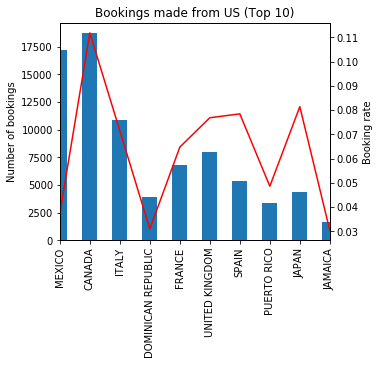

In [286]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
rspine = ax2.spines['right']
#rspine.set_position(('axes', 1.25))
ax2.set_frame_on(True)
ax2.patch.set_visible(False)
fig.subplots_adjust(right=0.75)

ax2.set_autoscale_on(False)

ax.set_ylabel('Number of bookings')
#ax2.set_ylabel("Booking rate", color='r')

from_us_top_10.from_us_booked.plot(ax=ax, kind="bar")
from_us_top_10.booking_rate.plot(ax=ax2, style='r-', secondary_y=True,
                                yticks=[0.02,0.04,0.06,0.08,0.1,0.12,0.14,0.16,0.18,0.2])

ax2.set_ylim([0.02,0.2])
#plt.xticks(df.index, df['m_srcaddr'], rotation=90)
plt.ylabel('Booking rate')
plt.title('Bookings made from US (Top 10)')

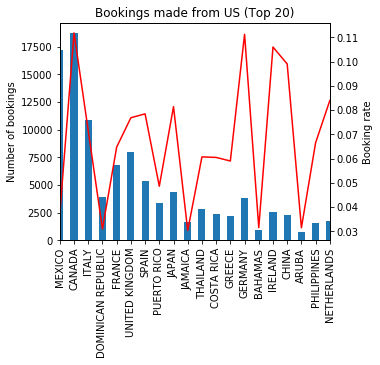

In [276]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
rspine = ax2.spines['right']
#rspine.set_position(('axes', 1.25))
ax2.set_frame_on(True)
ax2.patch.set_visible(False)
fig.subplots_adjust(right=0.75)

ax.set_ylabel('Number of bookings')
#ax2.set_ylabel("Booking rate", color='r')

from_us_top_20.from_us_booked.plot(ax=ax, kind="bar")
from_us_top_20.booking_rate.plot(ax=ax2, style='r-', secondary_y=True)

#plt.xticks(df.index, df['m_srcaddr'], rotation=90)
plt.ylabel('Booking rate')
plt.title('Bookings made from US (Top 20)')

In [318]:
from_us_group = from_us[['srch_adults_cnt', 'srch_children_cnt']].apply(tuple, axis=1).value_counts()
from_us_group_sum = from_us_group.sum()
from_us_group_rate = from_us_group/from_us_group_sum
from_us_group_rate

(2, 0)    6.051596e-01
(1, 0)    1.357360e-01
(2, 2)    6.022572e-02
(2, 1)    4.728826e-02
(3, 0)    4.073009e-02
(4, 0)    3.830072e-02
(3, 1)    1.173697e-02
(2, 3)    8.521256e-03
(1, 1)    8.422487e-03
(6, 0)    7.366550e-03
(5, 0)    5.576416e-03
(4, 1)    5.361075e-03
(4, 2)    4.389070e-03
(1, 2)    4.385255e-03
(3, 2)    4.017309e-03
(2, 4)    1.850327e-03
(3, 3)    1.494251e-03
(5, 1)    1.306039e-03
(8, 0)    9.245278e-04
(0, 0)    8.372043e-04
(1, 3)    7.261422e-04
(4, 3)    6.667961e-04
(4, 4)    6.231343e-04
(7, 0)    5.459843e-04
(6, 2)    4.760407e-04
(6, 1)    4.086405e-04
(5, 2)    3.437836e-04
(5, 3)    2.696010e-04
(6, 3)    2.649381e-04
(9, 0)    1.835491e-04
              ...     
(1, 8)    1.610823e-05
(4, 6)    1.441263e-05
(5, 6)    1.398873e-05
(8, 7)    1.059752e-05
(1, 7)    8.901919e-06
(2, 8)    8.478018e-06
(2, 7)    8.054117e-06
(9, 5)    8.054117e-06
(6, 9)    7.630216e-06
(8, 8)    7.630216e-06
(0, 2)    5.934612e-06
(7, 6)    5.086811e-06
(1, 9)    5

In [290]:
to_us = data[(data.user_location_country != "UNITED STATES OF AMERICA")
              &(data.hotel_country == "UNITED STATES OF AMERICA")]
to_us

,date_time,site_name,user_location_country,user_location_region,user_location_city,user_location_latitude,user_location_longitude,orig_destination_distance,user_id,is_mobile,...,srch_destination_id,hotel_country,is_booking,hotel_id,prop_is_branded,prop_starrating,distance_band,hist_price_band,popularity_band,cnt
10,2015-05-27 11:31:00,EXPEDIA.CA,CANADA,BC,SURREY,49.151573,-122.795127,2790.0344,-2147412448,0,...,5526989,UNITED STATES OF AMERICA,0,16702706,0,3.0,C,L,H,1
19,2015-02-26 16:25:00,EXPEDIA.CA,CANADA,ON,CORNWALL,45.031080,-74.763930,2185.7881,-2147138898,1,...,5526679,UNITED STATES OF AMERICA,0,1278718,1,5.0,VC,H,VH,1
36,2015-08-29 11:36:00,EXPEDIA.COM,JAPAN,12,MATSUDO,NaN,NaN,NaN,-2147013332,0,...,187773416,UNITED STATES OF AMERICA,0,305250055,0,4.0,F,M,L,1
37,2015-08-29 23:48:00,EXPEDIA.COM,JAPAN,12,MATSUDO,NaN,NaN,NaN,-2147013332,0,...,5526803,UNITED STATES OF AMERICA,0,68255520,0,3.0,F,M,M,1
38,2015-08-30 00:41:00,EXPEDIA.COM,JAPAN,12,MATSUDO,NaN,NaN,NaN,-2147013332,0,...,5526803,UNITED STATES OF AMERICA,0,149298417,0,3.0,VC,M,M,1
104,2015-09-02 13:10:00,EXPEDIA.CA,CANADA,AB,CALGARY,51.066751,-114.068730,1035.9843,-2145843848,0,...,24801518,UNITED STATES OF AMERICA,0,68937582,1,5.0,F,VH,H,1
117,2015-03-19 18:57:00,EXPEDIA.CA,CANADA,MB,THE PAS,53.810120,-101.252409,1395.3120,-2145719858,1,...,24801518,UNITED STATES OF AMERICA,0,1273603,1,4.0,M,M,VH,2
118,2015-03-21 19:51:00,EXPEDIA.CA,CANADA,MB,THE PAS,53.810120,-101.252409,1395.1071,-2145719858,1,...,5526679,UNITED STATES OF AMERICA,0,36711656,1,5.0,C,VH,H,1
119,2015-03-21 20:02:00,EXPEDIA.CA,CANADA,MB,THE PAS,53.810120,-101.252409,1395.1071,-2145719858,1,...,5526679,UNITED STATES OF AMERICA,0,54869286,1,5.0,C,VH,H,1
120,2015-03-21 20:24:00,EXPEDIA.CA,CANADA,MB,THE PAS,53.810120,-101.252409,1395.1071,-2145719858,1,...,5526679,UNITED STATES OF AMERICA,0,6689179,0,3.0,M,M,M,1


In [293]:
to_us_booked = to_us[to_us.is_booking == True].groupby(["user_location_country"]).size().sort_values(ascending=False)
to_us_clicked = to_us[to_us.is_booking == False].groupby(["user_location_country"]).size().sort_values(ascending=False)
to_us_df = pd.concat([to_us_booked,to_us_clicked,to_us_booked+to_us_clicked],axis=1)
to_us_df.columns = ["to_us_booked", "to_us_clicked", "sums"]
to_us_df
to_us_df_formatted = to_us_df[~to_us_df.sums.isnull()]
#to_us_negative_removed = to_us_null_dropped[to_us_null_dropped.sum >= 0]
to_us_df_formatted.to_us_booked = to_us_df_formatted.to_us_booked.astype(int)
to_us_df_formatted.to_us_clicked = to_us_df_formatted.to_us_clicked.astype(int)
to_us_df_formatted.sums = to_us_df_formatted.sums.astype(int)
to_us_top_10 = to_us_df_formatted.sort_values("sums",ascending =False)[:10]
to_us_top_20 = to_us_df_formatted.sort_values("sums",ascending =False)[:20]
to_us_top_10["booking_rate"] = to_us_top_10.to_us_booked / to_us_top_10.to_us_clicked
to_us_top_20["booking_rate"] = to_us_top_20.to_us_booked / to_us_top_20.to_us_clicked

In [323]:
30527 / to_us_df.to_us_booked.sum()

0.52429368827823097

In [320]:
to_us_top_10

,to_us_booked,to_us_clicked,sums,booking_rate
CANADA,30527,416927,447454,0.073219
GERMANY,4997,63960,68957,0.078127
MEXICO,2581,23876,26457,0.108100
PUERTO RICO,924,12955,13879,0.071324
COLOMBIA,764,10626,11390,0.071899
ISRAEL,756,9932,10688,0.076118
CHINA,1258,9273,10531,0.135663
COSTA RICA,672,9684,10356,0.069393
SOUTH KOREA,893,8919,9812,0.100123
SAUDI ARABIA,537,7768,8305,0.069130


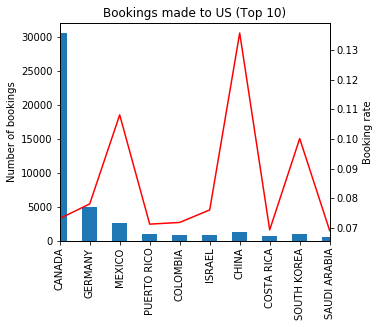

In [296]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
rspine = ax2.spines['right']
#rspine.set_position(('axes', 1.25))
ax2.set_frame_on(True)
ax2.patch.set_visible(False)
fig.subplots_adjust(right=0.75)

ax2.set_autoscale_on(False)

ax.set_ylabel('Number of bookings')
#ax2.set_ylabel("Booking rate", color='r')

to_us_top_10.to_us_booked.plot(ax=ax, kind="bar")
to_us_top_10.booking_rate.plot(ax=ax2, style='r-', secondary_y=True,
                                yticks=[0.02,0.04,0.06,0.08,0.1,0.12,0.14,0.16,0.18,0.2])

ax2.set_ylim([0.02,0.2])
#plt.xticks(df.index, df['m_srcaddr'], rotation=90)
plt.ylabel('Booking rate')
plt.title('Bookings made to US (Top 10)')

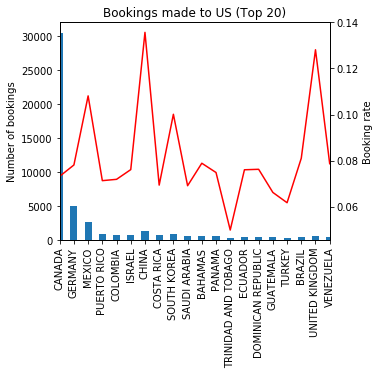

In [297]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
rspine = ax2.spines['right']
#rspine.set_position(('axes', 1.25))
ax2.set_frame_on(True)
ax2.patch.set_visible(False)
fig.subplots_adjust(right=0.75)

ax2.set_autoscale_on(False)

ax.set_ylabel('Number of bookings')
#ax2.set_ylabel("Booking rate", color='r')

to_us_top_20.to_us_booked.plot(ax=ax, kind="bar")
to_us_top_20.booking_rate.plot(ax=ax2, style='r-', secondary_y=True,
                                yticks=[0.02,0.04,0.06,0.08,0.1,0.12,0.14,0.16,0.18,0.2])

ax2.set_ylim([0.02,0.2])
#plt.xticks(df.index, df['m_srcaddr'], rotation=90)
plt.ylabel('Booking rate')
plt.title('Bookings made to US (Top 20)')

# Logistic Regression

In [364]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
sns.set(style="white")
from numpy import loadtxt, where
from pylab import scatter, show, legend, xlabel, ylabel

In [405]:
us_lr = us_data[["date_time","srch_ci","srch_co","orig_destination_distance",
                "is_booking","prop_is_branded","prop_starrating","distance_band",
                "hist_price_band","is_mobile","is_package"]]
us_lr["booking_date"] = us_lr["date_time"].str.extract('(....-..-..)', expand = True)
us_lr["formatted_booking_date"] = pd.to_datetime(us_lr.booking_date, format="%Y/%m/%d")
us_lr["formatted_ci_date"] = pd.to_datetime(us_lr.srch_ci, format="%Y/%m/%d",errors="coerce")
us_lr["formatted_co_date"] = pd.to_datetime(us_lr.srch_co, format="%Y/%m/%d",errors="coerce")
us_lr["num_days"] = (us_lr.formatted_ci_date - us_lr.formatted_booking_date).dt.days

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [333]:
us_lr

,date_time,srch_ci,srch_co,orig_destination_distance,is_booking,prop_is_branded,prop_starrating,distance_band,hist_price_band,is_mobile,is_package,booking_date,formatted_booking_date,formatted_ci_date,formatted_co_date,num_days
0,2015-09-03 16:37:00,2016-05-19,2016-05-23,5539.5830,0,0,3.0,M,L,1,0,2015-09-03,2015-09-03,2016-05-19,2016-05-23,259.0
1,2015-09-21 22:47:00,2016-05-12,2016-05-15,5873.0280,0,1,4.0,C,M,1,0,2015-09-21,2015-09-21,2016-05-12,2016-05-15,234.0
2,2015-11-15 21:15:00,2015-11-29,2015-11-30,5329.1407,0,1,4.0,M,H,1,0,2015-11-15,2015-11-15,2015-11-29,2015-11-30,14.0
3,2015-11-15 21:26:00,2016-05-23,2016-05-26,5329.1407,0,0,4.0,M,M,1,0,2015-11-15,2015-11-15,2016-05-23,2016-05-26,190.0
4,2015-11-15 23:06:00,2016-05-23,2016-05-26,5329.1407,0,0,4.0,M,H,1,0,2015-11-15,2015-11-15,2016-05-23,2016-05-26,190.0
5,2015-05-30 23:57:00,2015-06-30,2015-07-01,161.9662,0,1,3.0,VC,VH,1,0,2015-05-30,2015-05-30,2015-06-30,2015-07-01,31.0
6,2015-11-27 20:57:00,2015-12-18,2015-12-20,195.1040,0,1,3.0,M,M,1,0,2015-11-27,2015-11-27,2015-12-18,2015-12-20,21.0
7,2015-11-27 21:03:00,2015-12-18,2015-12-20,195.1040,0,1,4.0,M,L,1,0,2015-11-27,2015-11-27,2015-12-18,2015-12-20,21.0
8,2015-11-27 21:14:00,2015-12-18,2015-12-20,199.6104,0,1,3.0,C,M,1,0,2015-11-27,2015-11-27,2015-12-18,2015-12-20,21.0
9,2015-04-23 23:39:00,2015-05-20,2015-05-23,5477.8567,0,0,5.0,VC,VH,0,0,2015-04-23,2015-04-23,2015-05-20,2015-05-23,27.0


In [369]:
def logistic_regression(dataframe, col_list):
    X = np.array(dataframe[col_list])
    #X = MinMaxScaler.fit_transform(X)
    y = np.array(dataframe["is_booking"])
    pos = where(y == 1)
    neg = where(y == 0)
    scatter(X[pos, 0], X[pos, 1], marker='o', c='b')
    scatter(X[neg, 0], X[neg, 1], marker='x', c='r')
    xlabel(col_list[0])
    ylabel(col_list[1])
    legend(['Click', 'Book'])
    show()

ValueError: First argument must be a sequence

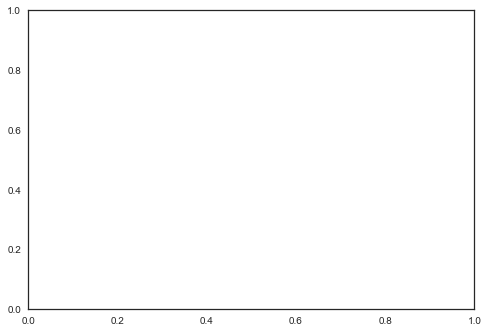

In [370]:
logistic_regression(us_lr,["hist_price_band","num_days"])

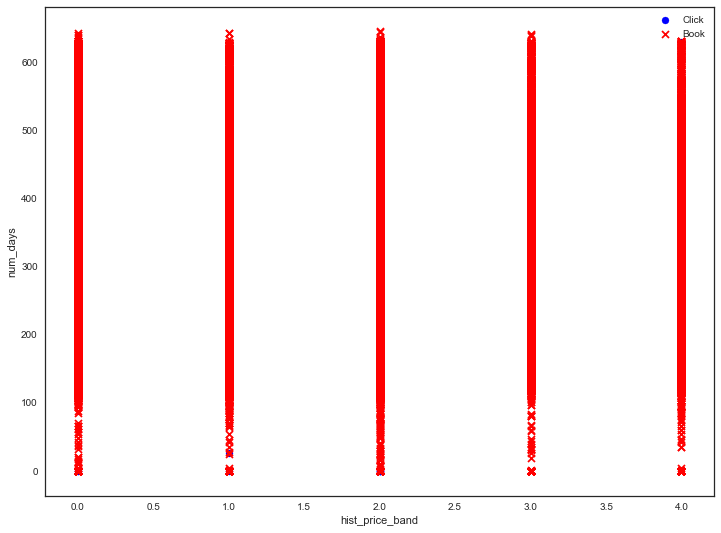

In [409]:
df_lr = us_lr.copy()
col_list = ["hist_price_band","num_days"]
for c in col_list:
    df_lr[c] = df_lr[c].astype('category').cat.codes

X = np.array(df_lr[col_list])
y = np.array(df_lr["is_booking"])
pos= y == 1
neg = y == 0

fig, ax = plt.subplots(figsize=(12, 9))
scatter(X[pos, 0], X[pos, 1], marker='o', c='b')
scatter(X[neg, 0], X[neg, 1], marker='x', c='r')
xlabel(col_list[0])
ylabel(col_list[1])
legend(['Click', 'Book'])
show()

In [406]:
df

,Row Labels,Sum of SUM,Sum of Southern Asia,Sum of Northern Europe,Sum of Western Asia,Sum of South-Eastern Asia,Sum of Central Asia,Sum of Northern Africa,Sum of Polynesia,Sum of Southern Europe,...,Sum of Northern America,Sum of Southern Africa,Sum of Oceania,Sum of Eastern Europe,Sum of Eastern Asia,Sum of Eastern Africa,Sum of Europe,Sum of Melanesia,Sum of Micronesian Region,Sum of Channel Islands
0,Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Channel Islands,23.0,0.0,5.0,2.0,1.0,0.0,0.0,0.0,0.0,...,2.0,9.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,Commonwealth of Independent States,2497.0,23.0,250.0,128.0,93.0,6.0,106.0,1.0,236.0,...,427.0,9.0,0.0,129.0,64.0,13.0,0.0,1.0,1.0,0.0
3,Eastern Europe,2408.0,20.0,146.0,95.0,100.0,3.0,98.0,1.0,261.0,...,378.0,7.0,0.0,661.0,38.0,13.0,0.0,2.0,0.0,0.0
4,Europe,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Northern Europe,4912.0,29.0,1863.0,160.0,144.0,1.0,194.0,4.0,311.0,...,1103.0,15.0,0.0,102.0,119.0,19.0,0.0,0.0,0.0,0.0
6,Southern Europe,3768.0,15.0,230.0,109.0,59.0,0.0,206.0,0.0,1964.0,...,435.0,1.0,0.0,102.0,45.0,4.0,0.0,0.0,0.0,0.0
7,Western Europe,35090.0,166.0,3540.0,1189.0,1463.0,17.0,2547.0,8.0,3738.0,...,6382.0,241.0,0.0,1047.0,648.0,113.0,0.0,7.0,3.0,0.0
8,Europe Total,48700.0,253.0,6034.0,1683.0,1860.0,27.0,3151.0,14.0,6510.0,...,8727.0,282.0,0.0,2042.0,914.0,163.0,0.0,10.0,4.0,0.0
9,Oceania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [353]:
X[pos, 0]

array([['L', 'M', 'L', ..., 'H', 'M', 'M'],
       ['L', 'L', 'L', ..., 'L', 'L', 'L']], dtype=object)